Project summary

This project explores the relationships between various socio-economic factors and the overall quality of life across different countries 
using a real-world dataset containing 200+ countries and semi-autonomous territories. The goal was to identify patterns, correlations, and insights by analyzing indicators such as purchasing power, cost of living, healthcare, safety, and pollution.

The analysis includes data cleaning, statistical exploration, and rich visualizations. A key finding was a strong positive correlation (≈0.85)
between purchasing power and quality of life, suggesting that economic capacity significantly influences overall living conditions.

The project was completed using pandas, Matplotlib, and SciPy for data handling, data cleaning, visualisation and regression modelling.

In [176]:
import pandas as pd

df = pd.read_csv(r"D:\Downloads\Quality_of_Life.csv")

print(df.columns)

df.head()

Index(['country', 'Purchasing Power Value', 'Purchasing Power Category',
       'Safety Value', 'Safety Category', 'Health Care Value',
       'Health Care Category', 'Climate Value', 'Climate Category',
       'Cost of Living Value', 'Cost of Living Category',
       'Property Price to Income Value', 'Property Price to Income Category',
       'Traffic Commute Time Value', 'Traffic Commute Time Category',
       'Pollution Value', 'Pollution Category', 'Quality of Life Value',
       'Quality of Life Category'],
      dtype='object')


,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'
3,Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,NaN,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low',0.0,NaN
4,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High',': 98.83','Very Low'


Is there a correlation between cost of living and safety in each country?

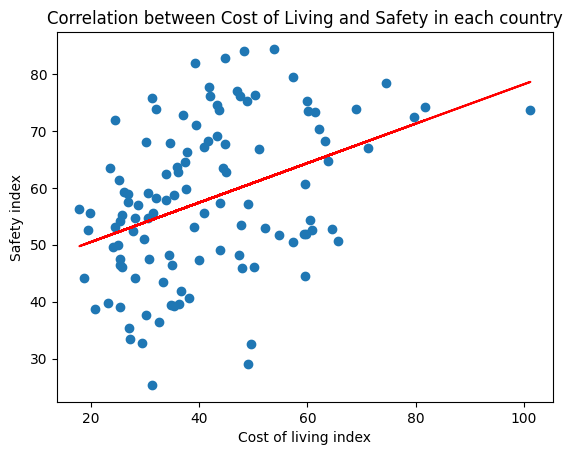

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv(r"D:\Downloads\Quality_of_Life.csv")
df.dropna(inplace = True)

x = df['Cost of Living Value']
y = df['Safety Value']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, color = "red")

plt.title("Correlation between Cost of Living and Safety in each country")
plt.xlabel("Cost of living index")
plt.ylabel("Safety index")
plt.show()

In [178]:
print(r)

0.3918365147466789


An r-value of 0.391 indicates a weak positive correlation between the cost of living and the safety of a country

Now to find correlation between quality of life index and cost of living index

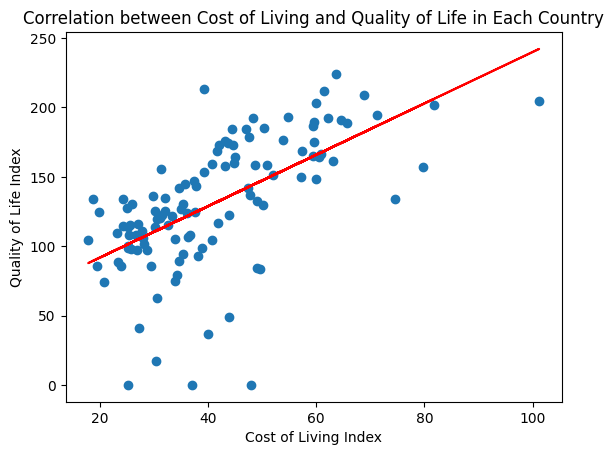

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv(r"D:\Downloads\Quality_of_Life.csv")

df['Cost of Living Value'] = (
    df['Cost of Living Value']
    .astype(str)
    .str.extract(r'([\d.]+)')[0] # converting the data type of the cost of living value into a string with unnecessary charachters removed
)
df['Cost of Living Value'] = pd.to_numeric(df['Cost of Living Value'], errors='coerce')

df['Quality of Life Value'] = (
    df['Quality of Life Value']
    .astype(str)
    .str.extract(r'([\d.]+)')[0]
)
df['Quality of Life Value'] = pd.to_numeric(df['Quality of Life Value'], errors='coerce')

df.dropna(inplace=True) #removes rows with empty values

x = df['Cost of Living Value']
y = df['Quality of Life Value']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, color='red')
plt.title("Correlation between Cost of Living and Quality of Life in Each Country")
plt.xlabel("Cost of Living Index")
plt.ylabel("Quality of Life Index")
plt.show()


In [180]:
print(r)

0.6112018633005255


The correlation between the two values is 0.611 which indicates a fairly strong positive correlation

In [183]:
df['Predicted_Quality_of_Life'] = slope * df['Cost of Living Value'] + intercept # this predicts the quality of life for each country based off the regression line

df['Residual'] = (df['Quality of Life Value'] - df['Predicted_Quality_of_Life']).abs() # this calculates the absolute difference between each country's actual quality of life and its predicted quality of life

furthest = df.sort_values('Residual', ascending=False).head(20) # this sorts each country by largest residual value

furthest[['country', 'Cost of Living Value', 'Quality of Life Value', 'Predicted_Quality_of_Life', 'Residual']] #p prints all these values

,country,Cost of Living Value,Quality of Life Value,Predicted_Quality_of_Life,Residual
219,Uganda,47.97,0.00,143.549239,143.549239
176,Rwanda,37.05,0.00,123.300925,123.300925
208,Tanzania,25.31,0.00,101.532134,101.532134
79,Ghana,30.49,17.47,111.137103,93.667103
29,Botswana,40.05,36.55,128.863649,92.313649
66,Ethiopia,43.89,48.88,135.983935,87.103935
159,Oman,39.30,213.42,127.472968,85.947032
153,Nigeria,27.29,41.24,105.203532,63.963532
105,Jamaica,49.56,83.92,146.497482,62.577482
213,Trinidad And Tobago,49.01,84.52,145.477649,60.957649


In [184]:
highestcost = df.sort_values('Cost of Living Value', ascending = False).head(20)

highestcost[['country', 'Cost of Living Value']]

,country,Cost of Living Value
204,Switzerland,101.18
95,Iceland,81.71
190,Singapore,79.72
93,Hong Kong (China),74.59
158,Norway,71.27
55,Denmark,68.90
223,United States,65.69
13,Australia,64.50
123,Luxembourg,63.72
102,Israel,63.19


In [185]:
highestqual = df.sort_values('Quality of Life Value', ascending = False).head(20)

highestqual[['country', 'Quality of Life Value']]

,country,Quality of Life Value
123,Luxembourg,224.31
159,Oman,213.42
148,Netherlands,211.85
55,Denmark,208.65
204,Switzerland,204.91
70,Finland,203.06
95,Iceland,202.04
158,Norway,194.48
203,Sweden,193.48
171,Qatar,192.73


Now let's investigate the correlation between healthcare value and quality of life

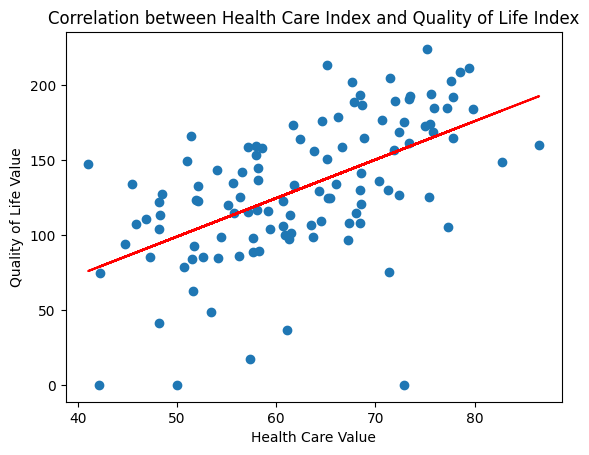

In [186]:
df.dropna(inplace = True)

df['Quality of Life Value'] = (
    df['Quality of Life Value']
    .astype(str)
    .str.extract(r'([\d.]+)')[0]
)
df['Quality of Life Value'] = pd.to_numeric(df['Quality of Life Value'], errors='coerce')

x = df['Health Care Value']
y = df['Quality of Life Value']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, color = "red")

plt.title("Correlation between Health Care Index and Quality of Life Index")
plt.xlabel("Health Care Value")
plt.ylabel("Quality of Life Value")
plt.show()

In [187]:
print(r)

0.5622215675499206


There is a moderate positive correlation between health care and quality of life

In [188]:
highestcare = df.sort_values('Health Care Value', ascending = False).head(20)

highestcare[['country', 'Health Care Value']]

,country,Health Care Value
206,Taiwan,86.50
197,South Korea,82.78
106,Japan,79.81
148,Netherlands,79.47
55,Denmark,78.50
14,Austria,77.83
71,France,77.78
70,Finland,77.57
209,Thailand,77.36
199,Spain,77.26


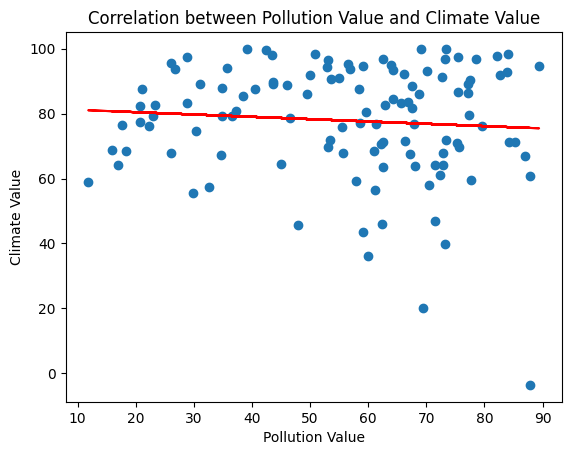

In [189]:
df.dropna(inplace = True)

x = df['Pollution Value']
y = df['Climate Value']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, color = "red")

plt.title("Correlation between Pollution Value and Climate Value")
plt.xlabel("Pollution Value")
plt.ylabel("Climate Value")
plt.show()

In [190]:
print(r)

-0.08100242197575225


There is very little correlation between the pollution and climate values of each country

In [191]:
highestpoll = df.sort_values('Pollution Value', ascending = False).head(20)

highestpoll[['country', 'Pollution Value']]

,country,Pollution Value
117,Lebanon,89.41
153,Nigeria,87.91
139,Mongolia,87.82
79,Ghana,86.91
18,Bangladesh,85.31
230,Vietnam,84.19
219,Uganda,84.05
147,Nepal,83.87
60,Egypt,82.67
166,Peru,82.19


In [192]:
lowestpoll = df.sort_values('Pollution Value', ascending = True).head(20)

lowestpoll[['country', 'Pollution Value']]

,country,Pollution Value
70,Finland,11.83
95,Iceland,15.84
64,Estonia,17.02
203,Sweden,17.66
158,Norway,18.32
14,Austria,20.73
55,Denmark,20.75
148,Netherlands,21.14
193,Slovenia,22.25
204,Switzerland,23.06


Is there a correlation between Quality of Life and Property Price to Income Value?

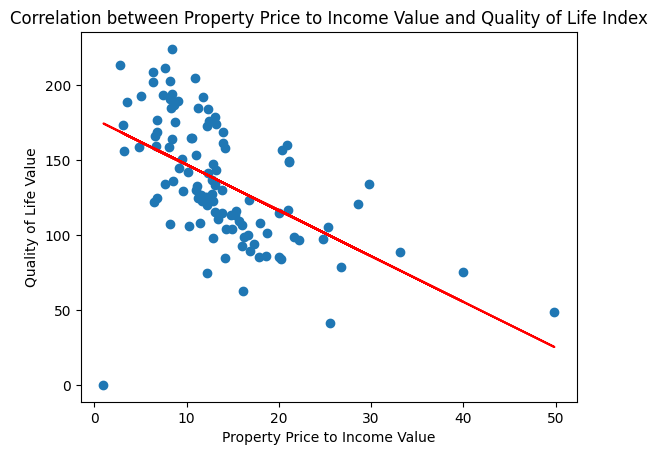

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

df = pd.read_csv(r"D:\Downloads\Quality_of_Life.csv")

df.dropna(inplace = True)

df['Quality of Life Value'] = (
    df['Quality of Life Value']
    .astype(str)
    .str.extract(r'([\d.]+)')[0]
)
df['Quality of Life Value'] = pd.to_numeric(df['Quality of Life Value'], errors='coerce')

df['Property Price to Income Value'] = (
    df['Property Price to Income Value']
    .astype(str)
    .str.extract(r'([\d.]+)')[0]
)
df['Property Price to Income Value'] = pd.to_numeric(df['Property Price to Income Value'], errors='coerce')

max_val = 60 # filtered to remove major outliers
df_filtered = df[df['Property Price to Income Value'] <= max_val]

x = df_filtered['Property Price to Income Value']
y = df_filtered['Quality of Life Value']


slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, color = "red")

plt.title("Correlation between Property Price to Income Value and Quality of Life Index")
plt.xlabel("Property Price to Income Value")
plt.ylabel("Quality of Life Value")
plt.show()

In [194]:
print(r)

-0.5418313663333778


There is a moderate negative correlation between Quality of Life Value and Property Price to Income Value

Let's find the biggest outliers:

In [195]:
df_filtered = df[df['Property Price to Income Value'] <= max_val].copy()

df_filtered["Expected Quality of Life Value"] = slope * x + intercept

df_filtered["Residual"] = (df_filtered["Quality of Life Value"] - df_filtered["Expected Quality of Life Value"]).abs()

furthest = df_filtered.sort_values('Residual', ascending=False).head(20)

furthest[['country', 'Property Price to Income Value', 'Quality of Life Value', 'Expected Quality of Life Value', 'Residual']]

,country,Property Price to Income Value,Quality of Life Value,Expected Quality of Life Value,Residual
219,Uganda,1.00,0.00,174.523813,174.523813
123,Luxembourg,8.48,224.31,151.685840,72.624160
139,Mongolia,16.08,62.52,128.481482,65.961482
18,Bangladesh,12.26,74.51,140.144725,65.634725
204,Switzerland,10.94,204.91,144.174955,60.735045
153,Nigeria,25.59,41.24,99.445502,58.205502
148,Netherlands,7.63,211.85,154.281064,57.568936
55,Denmark,6.36,208.65,158.158634,50.491366
14,Austria,11.76,192.07,141.671327,50.398673
70,Finland,8.16,203.06,152.662865,50.397135


Find correlation between Purchasing Power Value and Quality of Life Value

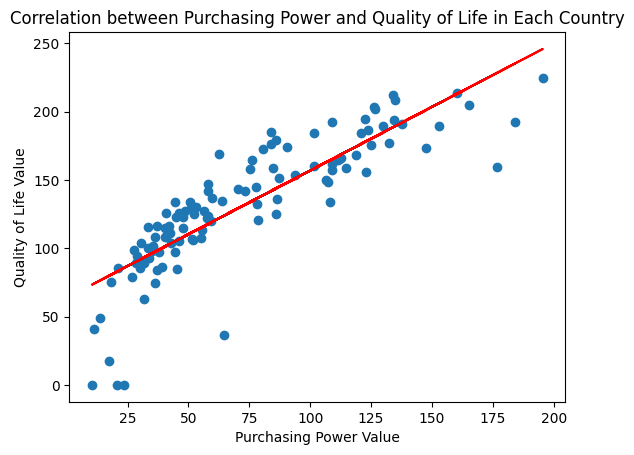

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv(r"D:\Downloads\Quality_of_Life.csv")

df['Quality of Life Value'] = (
    df['Quality of Life Value']
    .astype(str)
    .str.extract(r'([\d.]+)')[0]
)
df['Quality of Life Value'] = pd.to_numeric(df['Quality of Life Value'], errors='coerce')

df.dropna(inplace=True) #removes rows with empty values

x = df['Purchasing Power Value']
y = df['Quality of Life Value']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, color='red')
plt.title("Correlation between Purchasing Power and Quality of Life in Each Country")
plt.xlabel("Purchasing Power Value")
plt.ylabel("Quality of Life Value")
plt.show()

In [197]:
print(r)

0.8475723660257498


The correlation is 0.848 which indicates a very strong positive correlation between Purchasing Power and Quality of Life

In [198]:
highestpp = df.sort_values('Purchasing Power Value', ascending = False).head(20)

highestpp[['country', 'Purchasing Power Value', 'Quality of Life Value']]

,country,Purchasing Power Value,Quality of Life Value
123,Luxembourg,195.55,224.31
171,Qatar,184.27,192.73
113,Kuwait,176.80,159.55
204,Switzerland,165.31,204.91
159,Oman,160.38,213.42
223,United States,153.02,189.14
185,Saudi Arabia,147.37,173.20
13,Australia,137.58,190.69
55,Denmark,134.75,208.65
203,Sweden,134.51,193.48


Sort by largest outliers

In [199]:
df['Expected Quality of Life'] = slope * x + intercept

df['Residual'] = (df['Quality of Life Value'] - df['Expected Quality of Life']).abs()

furthest = df.sort_values('Residual', ascending=False).head(20) # this sorts each country by largest residual value

furthest[['country', 'Purchasing Power Value', 'Quality of Life Value', 'Expected Quality of Life', 'Residual']] #p prints all these values

,country,Purchasing Power Value,Quality of Life Value,Expected Quality of Life,Residual
29,Botswana,64.60,36.55,123.867160,87.317160
208,Tanzania,23.52,0.00,85.602074,85.602074
176,Rwanda,20.50,0.00,82.789012,82.789012
219,Uganda,10.33,0.00,73.315888,73.315888
113,Kuwait,176.80,159.55,228.378911,68.828911
79,Ghana,17.40,17.47,79.901433,62.431433
169,Portugal,62.54,168.85,121.948317,46.901683
64,Estonia,83.91,185.10,141.853986,43.246014
171,Qatar,184.27,192.73,235.337046,42.607046
193,Slovenia,85.89,178.94,143.698311,35.241689


In [200]:
df['Expected Quality of Life'] = slope * x + intercept

df['Residual'] = (df['Quality of Life Value'] - df['Expected Quality of Life']).abs()

furthest = df.sort_values('Residual', ascending=True).head(20) # this sorts each country by largest residual value

furthest[['country', 'Purchasing Power Value', 'Quality of Life Value', 'Expected Quality of Life', 'Residual']] #p prints all these values

,country,Purchasing Power Value,Quality of Life Value,Expected Quality of Life,Residual
159,Oman,160.38,213.42,213.084054,0.335946
2,Albania,42.82,104.16,103.579585,0.580415
156,North Macedonia,59.26,119.96,118.893071,1.066929
147,Nepal,28.36,88.97,90.110424,1.140424
13,Australia,137.58,190.69,191.846372,1.156372
209,Thailand,46.07,105.37,106.606886,1.236886
206,Taiwan,101.65,160.18,158.378393,1.801607
114,Kyrgyzstan,35.11,98.32,96.397895,1.922105
175,Russia,55.66,113.56,115.539753,1.979753
60,Egypt,21.15,85.41,83.394472,2.015528


Let's find the correlation between Safety Value and Quality of Life Value

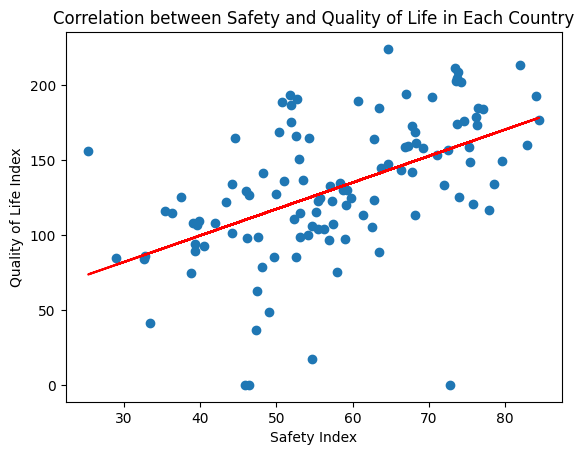

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv(r"D:\Downloads\Quality_of_Life.csv")

df['Quality of Life Value'] = (
    df['Quality of Life Value']
    .astype(str)
    .str.extract(r'([\d.]+)')[0]
)
df['Quality of Life Value'] = pd.to_numeric(df['Quality of Life Value'], errors='coerce')

df.dropna(inplace=True) #removes rows with empty values

x = df['Safety Value']
y = df['Quality of Life Value']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, color='red')
plt.title("Correlation between Safety and Quality of Life in Each Country")
plt.xlabel("Safety Index")
plt.ylabel("Quality of Life Index")
plt.show()

In [7]:
print(r)

0.5167001921407532


There is a moderate positive correlation between Safety and Quality of Life in each country

In [8]:
highestsafe = df.sort_values('Safety Value', ascending=False).head(20)

highestsafe[['country', 'Safety Value']]

,country,Safety Value
221,United Arab Emirates,84.43
171,Qatar,84.05
206,Taiwan,82.89
159,Oman,81.94
124,Macao (China),79.52
93,Hong Kong (China),78.49
11,Armenia,77.81
106,Japan,77.07
64,Estonia,76.37
185,Saudi Arabia,76.23


In [9]:
lowestsafe = df.sort_values('Safety Value', ascending=True).head(20)

lowestsafe[['country', 'Safety Value']]

,country,Safety Value
196,South Africa,25.36
213,Trinidad And Tobago,29.01
105,Jamaica,32.61
166,Peru,32.77
153,Nigeria,33.51
30,Brazil,35.36
10,Argentina,36.36
59,Ecuador,37.57
18,Bangladesh,38.79
45,Colombia,39.14


In [16]:
df.dropna(inplace = True)

df['Quality of Life Value'] = (
    df['Quality of Life Value']
    .astype(str)
    .str.extract(r'([\d.]+)')[0]
)

df['Quality of Life Value'] = pd.to_numeric(df['Quality of Life Value'], errors='coerce')

df['Predicted Quality of Life'] = slope * df['Safety Value'] + intercept 

df['Residual'] = (df['Quality of Life Value'] - df['Predicted Quality of Life']).abs() 

furthest = df.sort_values('Residual', ascending=False).head(20) 

furthest[['country', 'Safety Value', 'Quality of Life Value', 'Predicted Quality of Life', 'Residual']] 

,country,Safety Value,Quality of Life Value,Predicted Quality of Life,Residual
176,Rwanda,72.81,0.00,157.780801,157.780801
208,Tanzania,46.46,0.00,111.118353,111.118353
219,Uganda,45.88,0.00,110.091248,110.091248
79,Ghana,54.65,17.47,125.621786,108.151786
196,South Africa,25.36,155.84,73.752978,82.087022
123,Luxembourg,64.68,224.31,143.383621,80.926379
29,Botswana,47.30,36.55,112.605885,76.055885
203,Sweden,51.74,193.48,120.468551,73.011449
223,United States,50.74,189.14,118.697681,70.442319
13,Australia,52.71,190.69,122.186296,68.503704


In [17]:
df.dropna(inplace = True)

df['Quality of Life Value'] = (
    df['Quality of Life Value']
    .astype(str)
    .str.extract(r'([\d.]+)')[0]
)

df['Quality of Life Value'] = pd.to_numeric(df['Quality of Life Value'], errors='coerce')

df['Predicted Quality of Life'] = slope * df['Safety Value'] + intercept 

df['Residual'] = (df['Quality of Life Value'] - df['Predicted Quality of Life']).abs() 

furthest = df.sort_values('Residual', ascending=True).head(20) 

furthest[['country', 'Safety Value', 'Quality of Life Value', 'Predicted Quality of Life', 'Residual']] 

,country,Safety Value,Quality of Life Value,Predicted Quality of Life,Residual
190,Singapore,72.48,157.13,157.196413,0.066413
166,Peru,32.77,85.92,86.875131,0.955131
168,Poland,70.99,153.60,154.557816,0.957816
221,United Arab Emirates,84.43,176.65,178.358320,1.708320
28,Bosnia And Herzegovina,58.30,134.51,132.085464,2.424536
215,Turkey,58.74,130.42,132.864648,2.444648
130,Malta,57.09,132.54,129.942711,2.597289
105,Jamaica,32.61,83.92,86.591792,2.671792
96,India,55.67,124.70,127.428074,2.728074
33,Bulgaria,63.73,144.49,141.701293,2.788707
